In [2]:
import os
#used to format operating system command line instructions 
from sklearn.feature_extraction.text import CountVectorizer
# importing Vectorizer from sckit learn library
from sklearn.ensemble import RandomForestClassifier
# importing Random Forest Algorithm from sckit library
import re
# library for text string functions
from bs4 import BeautifulSoup
#beautiful soup removes html tags

import nltk
#library for natural language processing

from nltk.corpus import stopwords 
import pandas as pd 
# used to parse csv files
import numpy as np 

In [3]:
def review_to_wordlist( review, remove_stopwords=False ):
        # Function to convert a document to a sequence of words,
        # optionally removing stop words.  Returns a list of words.
        #
        # 1. Remove HTML
        review_text = BeautifulSoup(review).get_text()
        #
        # 2. Remove non-letters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
        #
        # 3. Convert words to lower case and split them
        words = review_text.lower().split()
        #
        # 4. Optionally remove stop words (false by default)
        if remove_stopwords:
            stops = set(stopwords.words("english"))
            words = [w for w in words if not w in stops]
        #
        # 5. Return a list of words
        return(words)

In [4]:
train=pd.read_csv(('labeledTrainData.tsv'),header=0,delimiter="\t",quoting=3)
test=pd.read_csv(('TestData.tsv'),header=0 ,delimiter="\t",quoting =3)

In [5]:
print ('sample review......')
print (train["review"][0])	

sample review......
"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit

In [6]:
import nltk
nltk.download('stopwords')
clean_train_review=[]

for i in range(0,len(train["review"])):
	clean_train_review.append(" ".join(review_to_wordlist(train["review"][i],True)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shruti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
Vectorizer=CountVectorizer( analyzer="word" ,tokenizer= None ,preprocessor=None,stop_words=None ,max_features=5000)

In [8]:
train_data_features=Vectorizer.fit_transform(clean_train_review)
#fitting the clean review data into the vectorizer
train_data_features=train_data_features.toarray()

In [9]:
forest=RandomForestClassifier(n_estimators=100)
#initialise a random forest with 100 trees
forest=forest.fit(train_data_features,train["sentiment"])

In [10]:
clean_test_data=[]

for i in range(0,len(test["review"])):
	clean_test_data.append(" ".join(review_to_wordlist(test["review"][i],True)))

test_data_feature=Vectorizer.transform(clean_test_data)
test_data_feature=test_data_feature.toarray()

In [11]:
result=forest.predict(test_data_feature)

In [12]:
output=pd.DataFrame(data={"id":test["id"],"sentiment":result})
#calling pandas to convert the data into a csv format
output.to_csv(('Movie_Sentiment.csv'),index=False,quoting=3)
print("Data written to csv.")

Data written to csv.


In [13]:
df=pd.read_csv("Test.csv")

In [14]:
clean_test_data=[]

for i in range(0,len(df["text"])):
	clean_test_data.append(" ".join(review_to_wordlist(df["text"][i],True)))

test_data_feature=Vectorizer.transform(clean_test_data)
test_data_feature=test_data_feature.toarray()

In [15]:
result=forest.predict(test_data_feature)

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(df["label"],result))
print('Mean Squared Error:', metrics.mean_squared_error(df["label"],result))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df["label"],result)))

Mean Absolute Error: 0.0752
Mean Squared Error: 0.0752
Root Mean Squared Error: 0.27422618401604176


In [17]:
print(metrics.accuracy_score(df["label"],result))

0.9248


In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
mnb=MultinomialNB()

In [20]:
mnb.fit(train_data_features,train["sentiment"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
res=mnb.predict(test_data_feature)

In [22]:
print(metrics.accuracy_score(df["label"],res))

0.8624


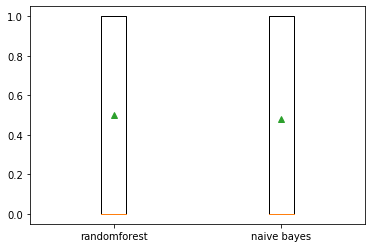

In [24]:
from matplotlib import pyplot
pyplot.boxplot([result, res], labels=['randomforest', 'naive bayes'], showmeans=True)
pyplot.show()

In [25]:
!pip install mlxtend

In [34]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=mnb, 
                          estimator2=forest, 
                          X=X, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

ValueError: Input X must be non-negative